In [95]:
'''
                                 TP 3 - Analyse en composantes principales.

Le but de ce TP est d’étudier l’influence de la réduction de dimension par analyse en 
composantes principales sur les performances reconnaissance de caractères manuscrits et 
en compression d’image. Les fonctions en italique sont des fonctions de la bibliothèque 
sklearn. Vous pouvez facilement trouver des informations détaillées sur ces fonctions.

'''

'\n                                 TP 3 - Analyse en composantes principales.\n\nLe but de ce TP est d’étudier l’influence de la réduction de dimension par analyse en \ncomposantes principales sur les performances reconnaissance de caractères manuscrits et \nen compression d’image. Les fonctions en italique sont des fonctions de la bibliothèque \nsklearn. Vous pouvez facilement trouver des informations détaillées sur ces fonctions.\n\n'

In [1]:
'''
Analyse de la base de données. 

'''


#on charge la base de données digits et on récupère les données/labels

from sklearn import datasets
from pylab import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn import datasets
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target


In [2]:
#dimension des données : 1797 observations pour 64 descriptions
#nous sommes donc en 64 dimensions
X.shape

(1797, 64)

In [3]:
#nombre d'exemples par classe :
#on convertit digits en dataframe en ajoutant la colonne des labels
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df['label'] = y

#on applique un filtre pour afficher le nombre d'observations par label
#on peut changer le label dans eq() pour voir les observations associé à ce dernier
df_mask=df[df.label.eq(1)]
df_mask

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1
21,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1
42,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,16.0,8.0,0.0,0.0,1
47,0.0,0.0,0.0,1.0,11.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,14.0,6.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,0.0,0.0,4.0,10.0,12.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,10.0,0.0,0.0,0.0,1
1757,0.0,0.0,4.0,16.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,12.0,12.0,2.0,0.0,0.0,1
1760,0.0,0.0,1.0,12.0,10.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,7.0,12.0,10.0,0.0,0.0,1
1766,0.0,0.0,8.0,12.0,11.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,11.0,12.0,7.0,0.0,0.0,1


In [4]:
#on peut sélectionner une donnée comme ceci :
donnee = X[1,:] #on récupère une ligne, donc une donnée
classe = y[1] #et sa classe

#on remarque que les 10 premières données ont aussi les 10 premiers labels
liste=[]
for i in range(10):
    liste.append(y[i]) # et sa classe
    
liste

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

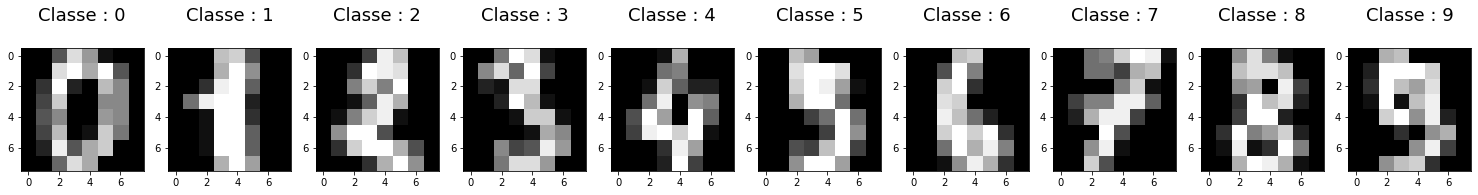

In [5]:
#on peut donc les représenter pour jeter un oeil à la base brute

plt.figure(figsize=(26,10))
for i in range(10):
    image = X[i, :]
    classe = y[i]
    plt.subplot(1, 10, i + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Classe : %i\n' % classe, fontsize = 18)
plt.show()

In [6]:
#ALGORITHME DES K-VOISINS

#on sépare la base en deux : 70% apprentissage et 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#on crée un classificateur avec k = 3
model = neighbors.KNeighborsClassifier(n_neighbors=3)

#on ajuste le modèle avec nos données et nos labels d'entraînement
model.fit(X_train, y_train)

#on veut prédire des labels sur nos données de test
predictions = model.predict(X_test)
predictions

#on peut sortir une accuracy en comparant avec nos labels de test
acc = np.sum(predictions == y_test)/len(y_test)
print(acc)

0.987037037037037


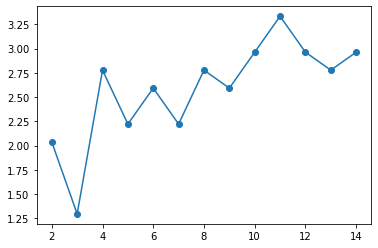

In [7]:
#on peut boucler afin de trouver le meilleur k pour notre classificateur
errors = []
for k in range(2,15):
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    errors.append(100*(1 - model.fit(X_train, y_train).score(X_test, y_test)))

plt.plot(range(2,15), errors, 'o-')
plt.show()

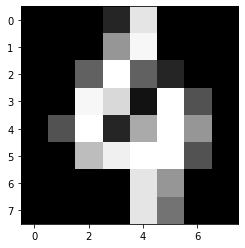

In [8]:
#on peut vérifier nous-même ce que notre algorithme a prédit :
#on prend un donnée et on prédit son label avec ce même algorithme

donnee = X[100]
donnee1 = donnee.reshape(1,-1)
plt.imshow(digits['images'][100], cmap='Greys_r')
plt.show()


In [9]:
#on regarde ce que notre modèle prédit. il affiche un 4, c'est bon ! :)
model.predict(donnee1)

array([4])

In [10]:
#on répete plusieurs fois la procédure de partition-classification et on conclue.

#                                               k = 3

#on crée un classificateur
model = neighbors.KNeighborsClassifier(n_neighbors=4)

#on ajuste le modèle avec nos données et nos labels d'entraînement
model.fit(X_train, y_train)

#on veut prédire des labels sur nos données de test
predictions = model.predict(X_test)
predictions

#on peut sortir une accuracy en comparant avec nos labels de test
acc = np.sum(predictions == y_test)/len(y_test)
print(acc)

'''
Quand on exécute plusieurs fois la cellule, l'accuracy augmente ! C'est logique : plus on entraîne le modèle, plus il apprend
et moins il a de chance de se tromper, donc l'accuracy augmente.

'''

0.9722222222222222


"\nQuand on exécute plusieurs fois la cellule, l'accuracy augmente ! C'est logique : plus on entraîne le modèle, plus il apprend\net moins il a de chance de se tromper, donc l'accuracy augmente.\n\n"

'\nOn utilise pas toutes les données car PCA n\'est pas un algorithme d\'apprentissage.\nIl n\'a pas besoin d\'autant de données afin de réduire les features.\n\nLa figure ci-dessous montre les 10 différentes classes, regroupées en clusters.\nOn peut remarquer que les clusters 0 et 6 sont les plus séparées des autres, donc\nce sont possiblement les plus faciles à séparer du reste, mais peuvent légèrement se confondre.\n\nLes classes les plus difficiles à séparer seraient des clusters "contagieux", c\'est à dire des chiffres qui\nauraient du mal à se différencier : on peut voir sur la figure que les clusters 9 et 3 sont contagieux => il sera donc\nplus difficile de séparer un 9 d\'un 3 qu\'un 9 d\'un 4 (en magenta) par exemple.\n\nChaque composant sera plus ou moins utile à la séparation d\'un cluster en particulier.\n\n'

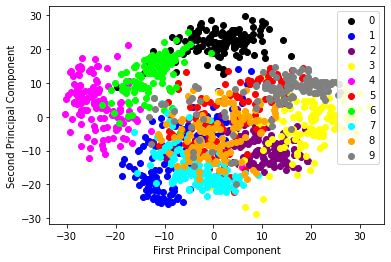

In [11]:
'''
Analyse en composantes principales.

RAPPEL : 
Cette méthode transforme un ensemble de variables éventuellement corrélées en un nouvel ensemble de variables aussi peu corrélées que possible. 
Les nouvelles variables se situent dans un nouveau système de coordonnées tel que la plus grande variance est obtenue en 
projetant les données dans la première coordonnée, la deuxième plus grande variance en projetant dans la deuxième coordonnée, 
et ainsi de suite. Ces nouvelles coordonnées sont appelées composantes principales ; 
nous avons autant de composantes principales que le nombre de dimensions d'origine, mais nous ne gardons que celles qui ont 
une variance élevée. Chaque nouvelle composante principale ajoutée à l'ensemble des composantes principales doit respecter 
la restriction selon laquelle elle doit être orthogonale (c'est-à-dire non corrélée) aux composantes principales restantes. 
L'ACP peut être considérée comme une méthode qui révèle la structure interne des données ; 
elle fournit à l'utilisateur une ombre de dimension inférieure des objets originaux. 
Si nous ne conservons que les premières composantes principales, la dimensionnalité des données est réduite et 
il est donc plus facile de visualiser la structure des données. Si nous ne conservons, par exemple, que les première et 
deuxième composantes, nous pouvons examiner les données à l'aide d'un nuage de points bidimensionnel.

image(x)=mean+x1⋅(basis 1)+x2⋅(basis 2)+x3⋅(basis 3)⋯
PCA peut être considérée comme un processus consistant à choisir des fonctions de base optimales, de sorte que l'addition des 
premières d'entre elles suffise à reconstruire correctement la majeure partie des éléments de l'ensemble de données. 
Les composantes principales, qui agissent comme la représentation à faible dimension de nos données, 
sont simplement les coefficients qui multiplient chacun des éléments de cette série.

'''

#import
from sklearn.decomposition import PCA

#on utilise le solveur PCA de sklearn pour réaliser la PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

#on peut représenter nos données en fonction de ces deux composants
colors = ['black', 'blue', 'purple', 'yellow', 'magenta', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    px = X_pca[:, 0][y_train == i]
    py = X_pca[:, 1][y_train == i]
    plt.scatter(px, py, c=colors[i])
    
plt.legend(digits.target_names)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

'''
On utilise pas toutes les données car PCA n'est pas un algorithme d'apprentissage.
Il n'a pas besoin d'autant de données afin de réduire les features.

La figure ci-dessous montre les 10 différentes classes, regroupées en clusters.
On peut remarquer que les clusters 0 et 6 sont les plus séparées des autres, donc
ce sont possiblement les plus faciles à séparer du reste, mais peuvent légèrement se confondre.

Les classes les plus difficiles à séparer seraient des clusters "contagieux", c'est à dire des chiffres qui
auraient du mal à se différencier : on peut voir sur la figure que les clusters 9 et 3 sont contagieux => il sera donc
plus difficile de séparer un 9 d'un 3 qu'un 9 d'un 4 (en magenta) par exemple.

Chaque composant sera plus ou moins utile à la séparation d'un cluster en particulier.

'''


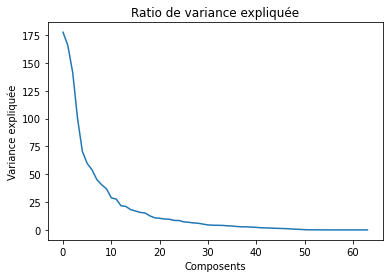

array([1.77604989e+02, 1.65541527e+02, 1.41383413e+02, 1.00215413e+02,
       7.05838279e+01, 5.97222148e+01, 5.39755740e+01, 4.52248636e+01,
       4.05401888e+01, 3.68644552e+01, 2.88112179e+01, 2.76841616e+01,
       2.17162424e+01, 2.10592969e+01, 1.82209831e+01, 1.69652601e+01,
       1.57138229e+01, 1.51819196e+01, 1.25596273e+01, 1.08620509e+01,
       1.04540580e+01, 9.82500818e+00, 9.62701329e+00, 8.54039621e+00,
       8.43165768e+00, 7.21926194e+00, 6.83829922e+00, 6.28959277e+00,
       5.98572748e+00, 5.18703562e+00, 4.48505399e+00, 4.21618528e+00,
       4.15869252e+00, 4.05638270e+00, 3.70004634e+00, 3.51352691e+00,
       3.05035117e+00, 2.79083383e+00, 2.77657889e+00, 2.48491409e+00,
       2.30102742e+00, 1.90081310e+00, 1.80368985e+00, 1.68139902e+00,
       1.46134272e+00, 1.32640122e+00, 1.18139995e+00, 9.68806305e-01,
       6.21228695e-01, 5.07737999e-01, 2.11387598e-01, 8.73824288e-02,
       7.32037394e-02, 5.32041236e-02, 4.69287765e-02, 1.43673654e-02,
      

In [12]:
#afin de sélectionner les nombres de features nécessaires à cette réduction
#on regarde l'inertie expliquée (variance expliquée) en fonction du nombre de composants

'''
Pour des problèmes à faible dimension, on applique le critère de Catell et 
on cherche le coude.

'''
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_)
plt.ylabel('Variance expliquée')
plt.xlabel('Composents')
plt.title('Ratio de variance expliquée')
plt.show()
pca.explained_variance_


"\nIci, nous avons un problème à forte dimension, nous utiliserons donc le premier \ncritère (Joliffe).\n===> il faudrait donc 30 composants.\n\nCes nouveaux composants sont :\n- classés par le nombre d'information que chacun retient\n- non correlés\n\n"

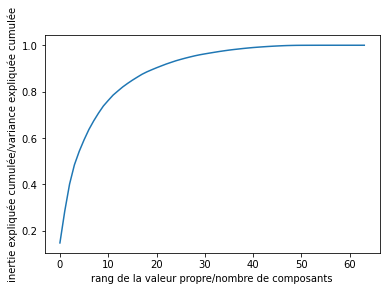

In [13]:
'''
Cette courbe quantifie la part de la variance totale, à 64 dimensions, 
contenue dans les N premières composantes.

Pour des problèmes à grande dimension, on applique le critère de Joliffe :
On regarde ensuite à quel nombre de PCA se trouve 90% de l'inertie.

'''

pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('rang de la valeur propre/nombre de composants')
plt.ylabel('inertie expliquée cumulée/variance expliquée cumulée');

'''
Ici, nous avons un problème à forte dimension, nous utiliserons donc le premier 
critère (Joliffe).
===> il faudrait donc 30 composants.

Ces nouveaux composants sont :
- classés par le nombre d'information que chacun retient
- non correlés

'''

In [14]:
'''
Classification.

'''

#on veut refaire knn mais cette fois, en prenant seulement les 30 composants trouvées
#précédemment.
#on sortira ensuite un tableau d'accuracy en changeant le nombre de composants pour comparer
#et conclure.

#on crée un tableau vide pour les accuracy
nbr_PCA=[i for i in range(30,64)]
acccy=[]


#                            pour M=30
pca = PCA(n_components=30)
pca.fit(X) #estime les composants

#on ajuste nos nouvelles données avec le pca précédent
X_pca = pca.transform(X) #nouvelle base => remplace X. on garde les mêmes y car pas de descripteurs liés

X_pca.shape #on retourne bien autant de données mais avec 30 descripteurs !

#ALGORITHME DES K-VOISINS

#on sépare la base en deux : 70% apprentissage et 30% test
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size = 0.3)

#on crée un classificateur avec k = 3
model = neighbors.KNeighborsClassifier(n_neighbors=3)

#on ajuste le modèle avec nos données et nos labels d'entraînement
model.fit(X_train_pca, y_train_pca)

#on veut prédire des labels sur nos données de test
predictions = model.predict(X_test_pca)
predictions

#on peut sortir une accuracy en comparant avec nos labels de test
acc = np.sum(predictions == y_test_pca)/len(y_test_pca)
print(acc)
acccy.append(acc)

0.9907407407407407


In [15]:
#on boucle pour le reste (de M + 1 à Dim)
for m in range(31,64):
    pca = PCA(n_components= m)
    pca.fit(X)
    X_pca = pca.transform(X)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size = 0.3)
    model = neighbors.KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train_pca, y_train_pca)
    predictions = model.predict(X_test_pca)
    acccy.append(np.sum(predictions == y_test_pca)/len(y_test_pca))

#on met nos données dans un dataframe     
accuracy= pd.DataFrame(list(zip(nbr_PCA, acccy)), columns=['Nombre de PCA', 'Accuracy'])
accuracy

,Nombre de PCA,Accuracy
0,30,0.990741
1,31,0.987037
2,32,0.988889
3,33,0.988889
4,34,0.985185
5,35,0.987037
6,36,0.983333
7,37,0.983333
8,38,0.992593
9,39,0.988889


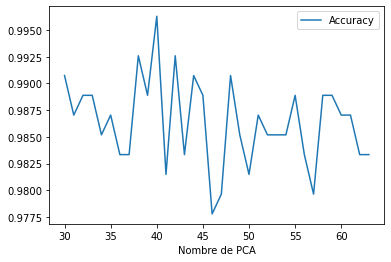

"\nEn regardant le courbe, on remarque que la réduction de dimension nous donne de meilleures performances qu'en prenant le\nnombre total de descripteurs !\nLe PCA est donc une méthode qui non seulement rélève la structure interne des données, prends moins de ressources mais donne\naussi de meilleures résultats pour le clustering.\nOn arrive mieux à identifier un groupe en prenant en compte des éléments pertinents.\n\n"

In [16]:
#on trace le graphe montrant la variation du taux de reconnaissance en fonction de M

accuracy.plot(x='Nombre de PCA', y='Accuracy')
plt.show()

'''
En regardant le courbe, on remarque que la réduction de dimension nous donne de meilleures performances qu'en prenant le
nombre total de descripteurs !
Le PCA est donc une méthode qui non seulement rélève la structure interne des données, prends moins de ressources mais donne
aussi de meilleures résultats pour le clustering.
On arrive mieux à identifier un groupe en prenant en compte des éléments pertinents.

'''

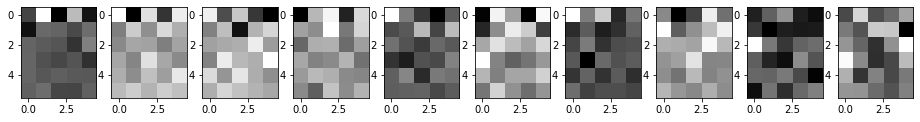

In [17]:
'''
Compression.

'''
#import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import decomposition
#on veut comparer les images entre les M composantes et les Dim dimensions
#et en dégager l'erreur.

#on compresse l'image
pca = PCA(n_components= 30)
pca.fit(X)
X_pca = pca.transform(X)

plt.figure(figsize=(16,10))
for i in range(10):
    image = X_pca[i, :]
    plt.subplot(1, 10, i + 1)
    plt.imshow(np.reshape(image, (6,5)), cmap=plt.cm.gray)
plt.show()

#voilà ce que les digits donnent lorsqu'on prend les 30 composantes

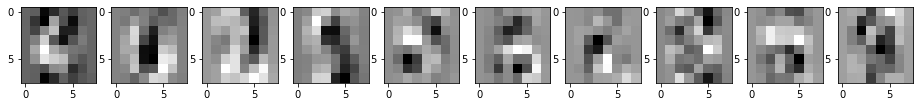

In [18]:
#on peut représenter les composantes
plt.figure(figsize=(16,10))
for i in range(10):
    image = pca.components_[i, :]
    plt.subplot(1, 10, i + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
plt.show()

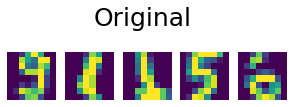

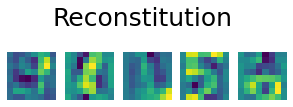

In [20]:
#on la reconstruit : reverse PCA => on reconstruit les variables d'origine depuis les composantes
#PCA reconstruction = PC scores * Eigenvectors**T + Mean
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

n_components = 30
image_shape = (8, 8)

#on normalise nos données
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

digits = load_digits()
digits = digits.data

n_samples, n_features = digits.shape
pca = decomposition.PCA(n_components=n_components, svd_solver='randomized', whiten=True)
digits_recons = pca.inverse_transform(pca.fit_transform(X_norm)) #déprojection des composantes sur les données, fit_transforme donne juste les composantes

#on choisit 5 digits au hasard et on dessine leur reconstruction avec les 30 composantes/eigenvecteurs
indices = np.random.choice(n_samples, 5, replace=False)

#original
plt.figure(figsize=(5,2))
for i in range(len(indices)):
    plt.subplot(1,5,i+1), plt.imshow(np.reshape(digits[indices[i],:], image_shape)), plt.axis('off')
plt.suptitle('Original', size=25)
plt.show()

#reconstruction
plt.figure(figsize=(5,2))
for i in range(len(indices)):
    plt.subplot(1,5,i+1), plt.imshow(np.reshape(digits_recons[indices[i],:], image_shape)), plt.axis('off')
plt.suptitle('Reconstitution'.format(n_components), size=25)
plt.show()

In [22]:
#on se retrouve de nouveau avec nos 64 descripteurs ! On peut retourner la différence :
X_recons = pca.inverse_transform(pca.transform(X_norm) )

erreur = ((X_recons - X_norm)**2).mean(axis=None)
print(erreur)
'''
On observe une perte après reconstitution. Par conséquent en passant par la PCA on pert qd même une quantité minime 
d'information mais pas forcément utile ! On reconnait parfaitement nos digits.
'''

0.10180511258106308


"\nOn observe une perte après reconstitution. Par conséquent en passant par la PCA on pert qd même une quantité minime \nd'information mais pas forcément utile ! On reconnait parfaitement nos digits.\n"

In [23]:
'''
CALCUL- METHODE.

Méthode pour calculer les PCA et projeter sur nos données.

- Normaliser/Centrer les données => xi' = (xi - mu)/sigma
- Calculer la matrice de covariance
- Calculer ses eigenvalues => intertie expliquée pour chaque descripteur
- Cacluler ses eigenvecteurs
- Faire la matrice de passage

'''
#import
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#on normalise nos données d'entraînement 
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
#print(X_norm)

#matrice de covariance => de manière automatique mais on pourrait la faire à la main
#elle va nous aider à voir quel descripteur sont corrélés ou non
#la diagonale de la matrice représente les variances, le reste les covariances
#plus la covariance entre deux descripteurs est forte, plus ils sont corrélés
matrix_cov = np.cov(X_norm,rowvar=False)
#print(matrix_cov)

#valeurs propres (eigenvalues) et vecteurs propres (eigenvectors) de la matrice de covariance
#ils nous donnent les composantes principales et nous permettent de projeter nos données à haute dimension dans une dimension réduite
#on a autant de valeurs/vecteurs propres que de descripteur
#ous pouvons visualiser les vecteurs propres, triés par rang de valeur propre, et identifier visuellement les composantes des vecteurs propres 
#qui dominent dans chaque valeur propre. Il s'agit essentiellement d'une visualisation des informations que l'analyse en composantes principales 
#a jugées les plus importantes.
egnvalues, egnvectors = np.linalg.eigh(matrix_cov)

print("Nombre de valeurs propres: "+str(egnvalues.shape))
print("Nombre de vecteurs propres: "+str(egnvectors.shape))

#on peut déterminer quelle composantes choisir en regardant la proportion de variance
#cela nous informe sur le nombre d'information représenté dans chaque composante
#VARIANCE EXPLIQUEE
#The explained variance of the  kth  principal component (given  d  total principal components) is given by:
#expliquée => λk/λ1+λ2+⋯+λk+⋯+λd
#cumulée => λ1+λ2+⋯+λk/λ1+λ2+⋯+λk+⋯+λd
tot_egnvalues = sum(egnvalues)
varexpl = [(i/tot_egnvalues) for i in sorted(egnvalues, reverse=True)]

# ===> on regarde ensuite sur le graphe de l'inertie cumulée/expliquée en fonction du nombre de composantes
#on regarde quel graphe/critère utiliser en fonction du type de dimensionnalité (haute ou basse)
#selon le nombre de composantes, on prend leurs vecteurs propres associés (si 2 composantes est optimal, on prend e1 et e2)

#on peut maintenant déterminer notre matrice de passage pour la projection des données dans cette nouvelle dimension
#on veut passer d'une dimension (N, 64) à (N, nbr_composantes)
pca = PCA(n_components=30)
P = pca.fit_transform(X_norm)
print("Nouvelle dimension : "+str(P.shape))

#la matrice de passage regroupe enfaite les n_composantes optimales pour en faire
#la transposée (on veut les colonnes en lignes):
matricepassage = (egnvectors[0:30]).T
print("Matrice de passage : "+str(matricepassage))

#on redimensionne nos données avec : C = matricepassage (X – m) = [c1 c2]^T
#on utilise normalement transform ou fit_transform



Nombre de valeurs propres: (64,)
Nombre de vecteurs propres: (64, 64)
Nouvelle dimension : (1257, 30)
Matrice de passage : [[ 0.00000000e+00  0.00000000e+00  1.59520266e-16 ...  1.77874666e-16
  -2.48894616e-16  5.23918642e-16]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.76775269e-18 ...  1.77025829e-16
  -1.19075589e-16  1.79719392e-16]
 ...
 [ 0.00000000e+00 -6.22399601e-03  7.04083857e-02 ... -1.04499120e-01
  -5.79672018e-02  2.06713718e-01]
 [ 0.00000000e+00  5.76630536e-02  5.66201450e-02 ...  7.50641568e-02
   1.95911835e-01  1.05279418e-01]
 [ 0.00000000e+00 -1.81134615e-01 -2.80555311e-01 ... -5.28019224e-02
  -1.37961845e-01  1.34389901e-01]]
